<a href="https://colab.research.google.com/github/FabioFloris02/OLA2025_Floris_Sonzini_Parenti_Singh_Gottschling/blob/main/OLA_prove_progetto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Requirement 1**

Prima Prova Progetto

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
class Environment:
  def __init__(self):
    pass

  def round(self, a_t):
    pass

In [ ]:
class SingleProductEnvironment(Environment):
  def __init__(self, T, upper_bound_value):
    self.T = T
    self.t = 0
    self.values = np.random.uniform(0, upper_bound_value, T)

  def round(self, product_price):
    if self.values[self.t] > product_price:
      r_t = product_price
    else:
      r_t = 0

    self.t +=1
    return r_t

In [ ]:
class Agent:
    def __init__(self):
        pass

    def pull_arm(self):
        pass

    def update(self, r_t):
        pass

In [ ]:
class UCB1Agent_SingleProduct(Agent):
    def __init__(self, T, prices, range=1):
        self.range = range
        self.K = len(prices) # K: numero di arms
        self.T = T
        self.a_t = None
        self.average_rewards = np.zeros(self.K)
        self.N_pulls = np.zeros(self.K)
        self.t = 0

    def pull_arm(self):
        if self.t < self.K:
            self.a_t = self.t
        else:
            ucbs = self.average_rewards + self.range*np.sqrt(2*np.log(self.T)/self.N_pulls)
            self.a_t = np.argmax(ucbs)

        return self.a_t

  # da rivedere
    def update(self, r_t):
        self.N_pulls[self.a_t] += 1
        self.average_rewards[self.a_t] += (r_t - self.average_rewards[self.a_t])/self.N_pulls[self.a_t] # come media ho il (acquisti totali) / (numero di volte che ho acquistato)
        self.t += 1

In [ ]:
upper_bound = 100  # Limite superiore del range
step = 5  # Passo tra i numeri

# Crea l'array
prices = np.arange(0, upper_bound, step)

In [ ]:
n_users = 500
T = n_users

env = SingleProductEnvironment(T, upper_bound)
agent = UCB1Agent_SingleProduct(T, prices)

agent_rewards = np.array([])

for t in range(T):
  pi_t = agent.pull_arm() ## the agent returns the index!!
  p_t = prices[pi_t] # I get the actual price

  r_t = env.round(p_t)
  agent.update(r_t)

  agent_rewards = np.append(agent_rewards, r_t)

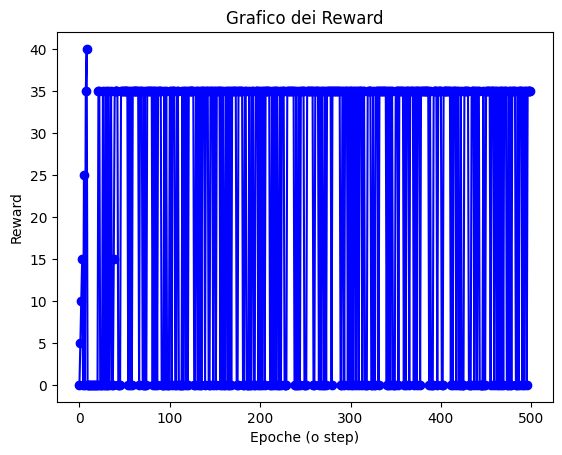

In [ ]:
# Crea il grafico
plt.plot(agent_rewards, marker='o', linestyle='-', color='b')

# Aggiungi titolo e etichette agli assi
plt.title("Grafico dei Reward")
plt.xlabel("Epoche (o step)")
plt.ylabel("Reward")

# Mostra il grafico
plt.show()